<a href="https://colab.research.google.com/github/Farah-Saleem91/Unsupervised-Machine-Learning---Clustering/blob/main/exercise_retail_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exercise
You are an owner of online retail, and you need to understand the needs and preferences of your customers to deliver more personalized and effective marketing campaigns, leading to increased customer retention and revenue.
Using you retail RFM data, you need to segment the customers into groups and suggest marketing efforts for each segment to enhance customer engagement and retention:
- Cluster the data using k-means
- Use Elbow and silhouette score methods to find the optimal number of clusters
- Fit the optimal k-means model and assign cluster for every customer
- Using explanatory analysis, try to understand the characteristics of each segment, and give each segment a significant name.
- Suggest proper marketing efforts for every segment.



In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [6]:
# Get Data
path='/content/drive/MyDrive/AXSOSACADEMY/rfm.csv'
df = pd.read_csv(path)
df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [8]:
#set id as index
df=df.set_index('CustomerID')
df.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [9]:
df.isna().sum()

,0
Recency,0
Frequency,0
MonetaryValue,0


In [10]:
# Use KMeans to create various customer segments.
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_scaled = pd. DataFrame (scaler.fit_transform(df), columns=df.columns)
X_scaled.head()


,Recency,Frequency,MonetaryValue
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


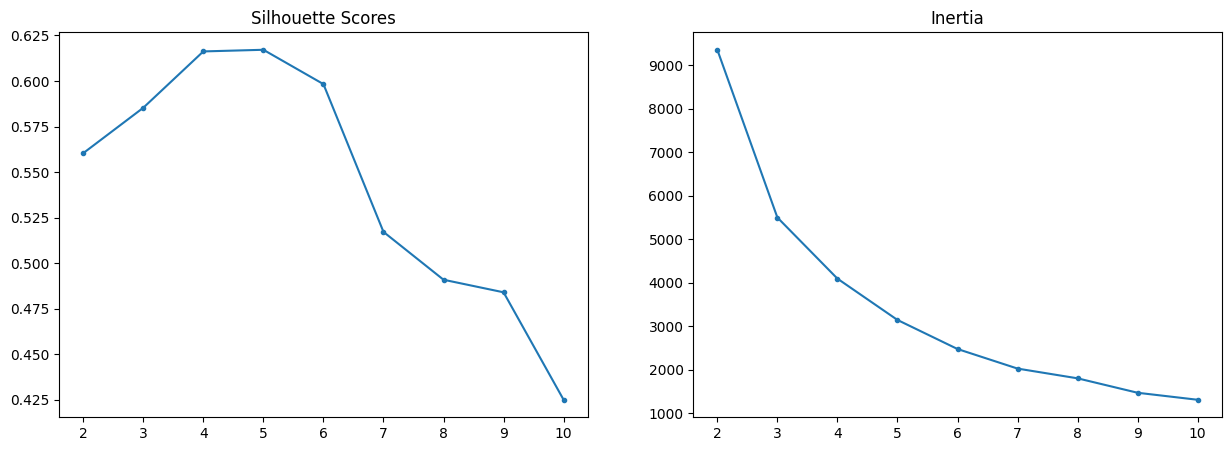

In [11]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range (2,11)
sils = []
inertias = []
for k in ks:
 kmeans = KMeans (n_clusters=k, n_init = 'auto', random_state=42)
 kmeans.fit(X_scaled)
 sils.append(silhouette_score(X_scaled, kmeans.labels_))
 inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots (1,2, figsize=(15,5))
axes[0].plot(ks, sils,marker='.')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias, marker='.')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [12]:
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=4, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Recency,Frequency,MonetaryValue,cluster
CustomerID,,,,
12346,326,1,77183.60,3
12347,2,7,4310.00,0
12348,75,4,1797.24,0
12349,19,1,1757.55,0
12350,310,1,334.40,1


In [18]:
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Recency,Frequency,MonetaryValue,cluster
CustomerID,,,,
12346,326,1,77183.60,1
12347,2,7,4310.00,0
12348,75,4,1797.24,0
12349,19,1,1757.55,0
12350,310,1,334.40,1


In [19]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index

cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Recency,Frequency,MonetaryValue
0,0,40.983906,4.852677,2012.111620
1,1,246.023788,1.582800,631.141410
2,2,7.142857,80.214286,122888.407143


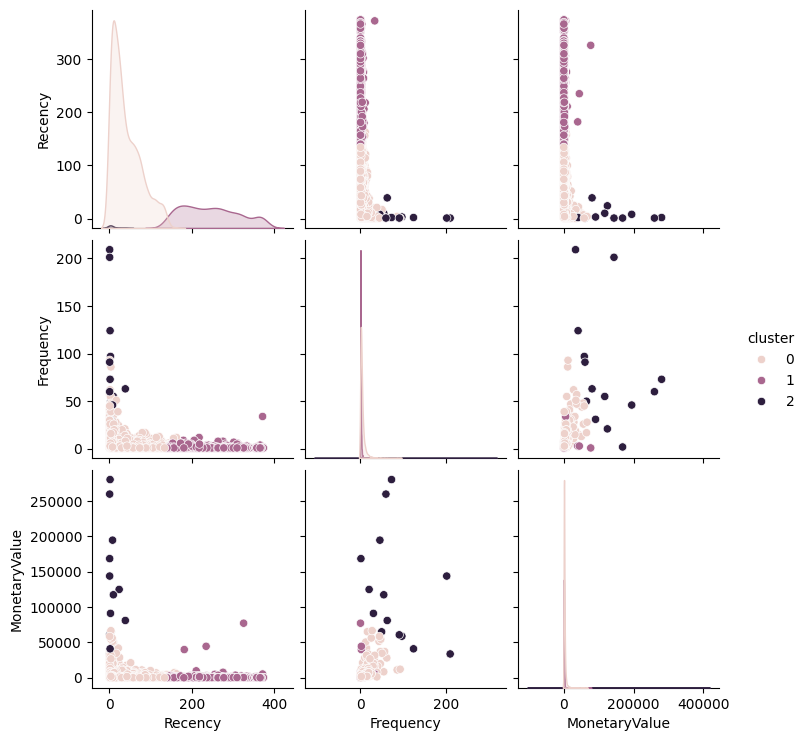

In [20]:
#visulaize the clusters
sns.pairplot(df, hue='cluster')

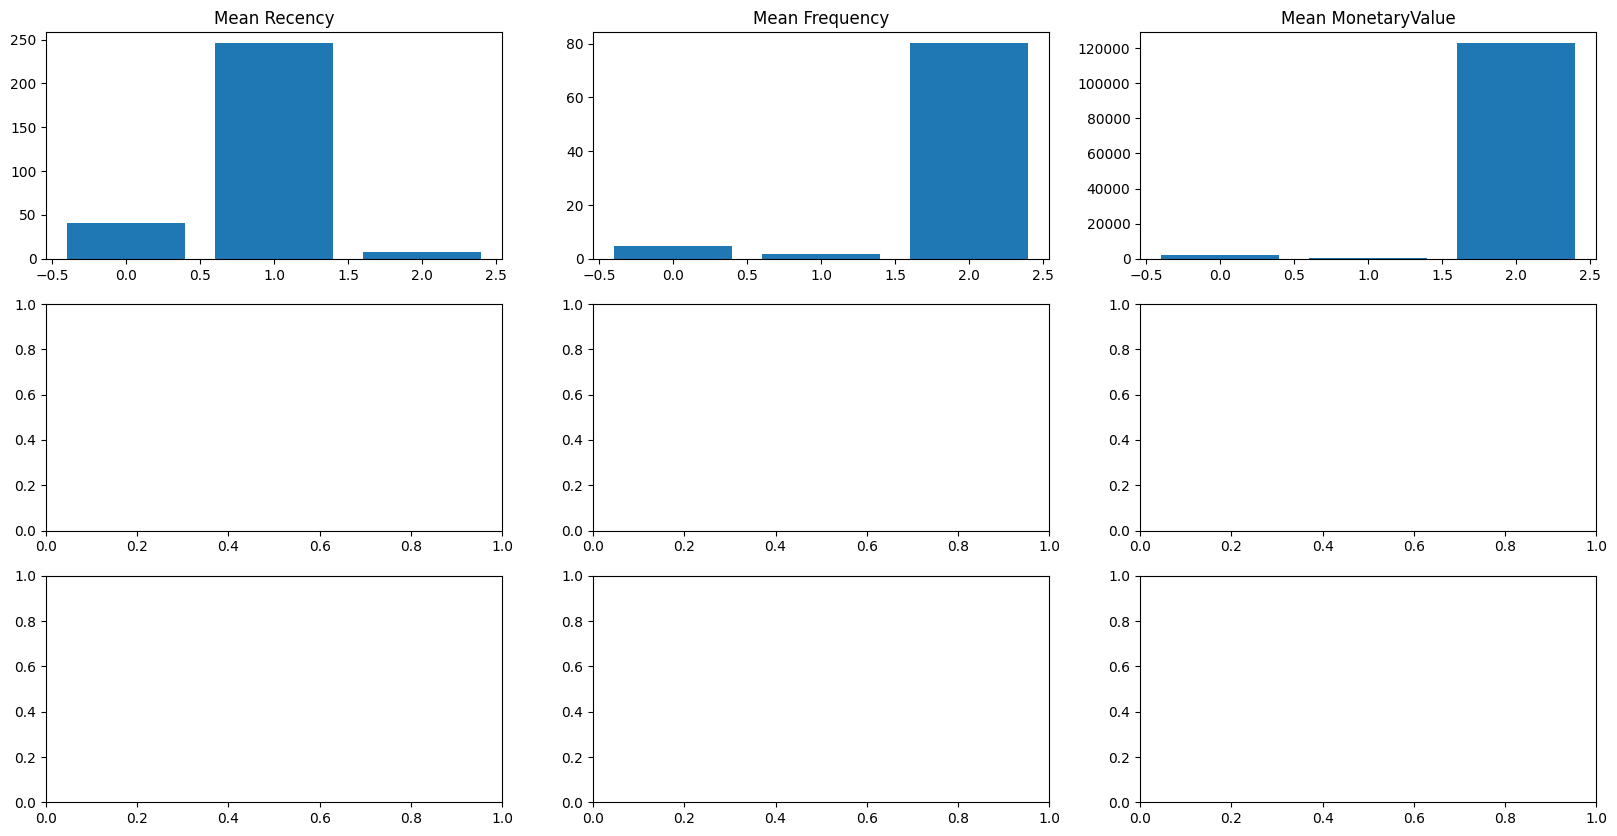

In [23]:
# Visualize means
fig, axes = plt.subplots (3,3, figsize = (20, 10))
# fig is an array of dimensions 3,4. axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate (cluster_groups.columns[1:]):
 axes[i].bar(cluster_groups ['cluster'], cluster_groups[col])
 axes[i].set_title(f'Mean {col}')